# CS 57300 Data Mining Assignment 2

Shuang Wu (wu1716@purdue.edu)

In [10]:
DATA_RAW = 'dating-full.csv'
DATA_NORMAILZED = 'dating.csv'
DATA_BINNED = 'dating-binned.csv'
TEST_SET = 'testSet.csv'
TRAINING_SET = 'trainingSet.csv'

## Preprocessing

In [11]:
%run -i preprocess.py {DATA_RAW} {DATA_NORMAILZED}

Quotes removed from 8316 cells.
Standardized 5707 cells to lower case.
Value assigned for male in column gender: 1.
Value assigned for European/Caucasian-American in column race: 2.
Value assigned for Latino/Hispanic American in column race_o: 3.
Value assigned for law in column field: 121.
Mean of attractive_important: 0.22.
Mean of sincere_important: 0.17.
Mean of intelligence_important: 0.20.
Mean of funny_important: 0.17.
Mean of ambition_important: 0.11.
Mean of shared_interests_important: 0.12.
Mean of pref_o_attractive: 0.22.
Mean of pref_o_sincere: 0.17.
Mean of pref_o_intelligence: 0.20.
Mean of pref_o_funny: 0.17.
Mean of pref_o_ambitious: 0.11.
Mean of pref_o_shared_interests: 0.12.


## Visualizing Interesting Trends in Data

### Relation between Gender and Preference Scores of Participant

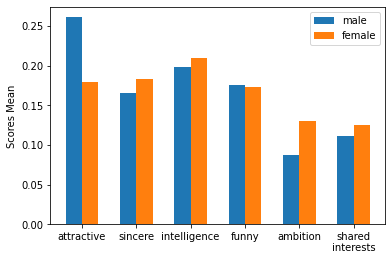

In [12]:
%run -i 2_1.py {DATA_NORMAILZED}

From the visualization, we can see that, for men, attractiveness is
relatively more important compared to the importance to women. On the other
hand, women tend to value the ambition of participants more than men. Overall,
the score means from women is usually higher than the scores from men.

### Relation between Success Rate and Ratings of Partner from Participant

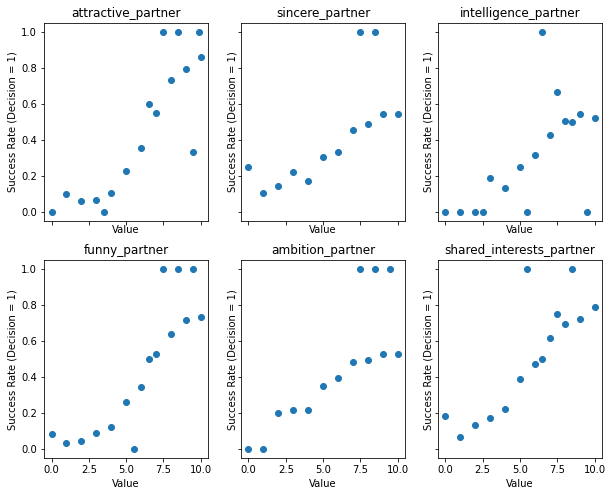

In [13]:
%run -i 2_2.py {DATA_NORMAILZED}

For all six different ratings, the success rates are positively correlated to the
value of the rating. If you draw the regression line for each subplot, you will
see that the slopes of _attractive_partner_, _funny_partner_ and
_shared_interests_partner_ are relatively higher than other subplots, which may
indicate that these 3 ratings impact more on the success rate. People tend to
care about these 3 ratings more than others.

## Convert Continuous Attributes to Categorical Attributes

In [14]:
%run -i discretize.py {DATA_NORMAILZED} {DATA_BINNED}

age: [3710 2932   97    0    5]
age_o: [3704 2899  136    0    5]
importance_same_race: [2980 1213  977 1013  561]
importance_same_religion: [3203 1188 1110  742  501]
pref_o_attractive: [4333 1987  344   51   29]
pref_o_sincere: [5500 1225   19    0    0]
pref_o_intelligence: [4601 2062   81    0    0]
pref_o_funny: [5616 1103   25    0    0]
pref_o_ambitious: [6656   88    0    0    0]
pref_o_shared_interests: [6467  277    0    0    0]
attractive_important: [4323 2017  328   57   19]
sincere_important: [5495 1235   14    0    0]
intelligence_important: [4606 2071   67    0    0]
funny_important: [5588 1128   28    0    0]
ambition_important: [6644  100    0    0    0]
shared_interests_important: [6494  250    0    0    0]
attractive: [  18  276 1462 4122  866]
sincere: [  33  117  487 2715 3392]
intelligence: [  34  185 1049 3190 2286]
funny: [   0   19  221 3191 3313]
ambition: [  84  327 1070 2876 2387]
attractive_partner: [ 284  948 2418 2390  704]
sincere_partner: [  94  353 162

## Training-Test Split

In [15]:
%run -i split.py {DATA_BINNED} {TRAINING_SET} {TEST_SET}

## Implement a Naive Bayes Classifier

### `nbc(t_frac=1, bin_size=5)`

In [16]:
%run -i 5_1.py

Training Accuracy: 0.78
Testing Accuracy: 0.75


### `nbc(t_frac=1, bin_size)`

Bin size: 2
Training Accuracy: 0.75
Testing Accuracy: 0.71
Bin size: 5
Training Accuracy: 0.78
Testing Accuracy: 0.75
Bin size: 10
Training Accuracy: 0.79
Testing Accuracy: 0.75
Bin size: 50
Training Accuracy: 0.80
Testing Accuracy: 0.75
Bin size: 100
Training Accuracy: 0.80
Testing Accuracy: 0.76
Bin size: 200
Training Accuracy: 0.80
Testing Accuracy: 0.76


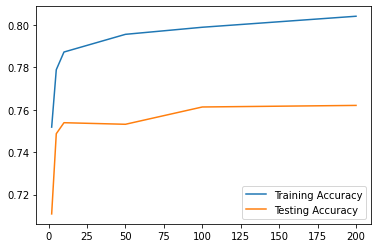

In [17]:
%run -i 5_2.py

With different bin sizes, we can see that the accuracy increases when the bin size increases. This is because a small bin size will "blur" the trait of each data, which makes the classification harder. A large bin size, e.g. 200, would be better to model the trait of the data.

### `nbc(frac_t, bin_size=5)`

frac: 0.01
Training Accuracy: 0.93
Testing Accuracy: 0.67
frac: 0.1
Training Accuracy: 0.84
Testing Accuracy: 0.74
frac: 0.2
Training Accuracy: 0.79
Testing Accuracy: 0.75
frac: 0.5
Training Accuracy: 0.79
Testing Accuracy: 0.75
frac: 0.6
Training Accuracy: 0.78
Testing Accuracy: 0.75
frac: 0.75
Training Accuracy: 0.77
Testing Accuracy: 0.76
frac: 0.9
Training Accuracy: 0.78
Testing Accuracy: 0.75
frac: 1
Training Accuracy: 0.78
Testing Accuracy: 0.75


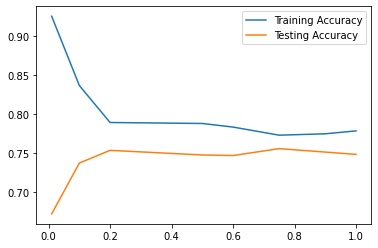

In [18]:
%run -i 5_3.py

With different sample rates (fractions), we can see that the test accuracy increases but training accuracy decreases when the size of training is larger (higher `frac`). Both accuracies converge with the size of the training set increasing. This is because when the size of the training set is too small, the trained model is overfitting, which results in extremely high training accuracy but poor performance on the test data, which is unseen to the classifier.